In [33]:
from venv import create
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA




In [34]:
'''
Splits our data into train and test sets.
'''
def train_test_data(features, labels):
    x_train, x_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.1, stratify=labels
    )

    return x_train, x_test, y_train, y_test


df = pd.read_csv('wine.csv')
print(df)

# get all rows and all columns from 'Alcohol' onwards;
# .values to convert to numpy array
features = df.loc[:, 'Alcohol':].values

# get our labels
labels = df[['Cultivar']].values

# split our data into train and test sets
x_train, x_test, y_train, y_test = train_test_data(features, labels)

     Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   
..        ...      ...         ...   ...                ...        ...   
173         3    13.71        5.65  2.45               20.5         95   
174         3    13.40        3.91  2.48               23.0        102   
175         3    13.27        4.28  2.26               20.0        120   
176         3    13.17        2.59  2.37               20.0        120   
177         3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06        

In [35]:

'''
Perform zero-mean and unit-variance standardization.
'''
def standardize_data(x_train, x_test):
    scaler = StandardScaler()

    # fit our scaler on the training data
    scaler.fit(x_train)

    # transform our train and test data on the fitted weights
    x_train_std = scaler.transform(x_train)
    x_test_std = scaler.transform(x_test)

    return x_train_std, x_test_std

# standardize our data
x_train_std, x_test_std = standardize_data(x_train, x_test)

In [36]:
'''
Perform dimension reduction using PCA.
'''
def reduce_dim(x_train, x_test):
    pca = PCA(n_components=5)

    # again, fit on training data
    pca.fit(x_train)

    # transform on both train and test data
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    return x_train_pca, x_test_pca

# reduce dimension
x_train_pca, x_test_pca = reduce_dim(x_train_std, x_test_std)

In [37]:
'''
Perform one-hot encoding on a list of labels.
'''
def to_onehot(arr):
    onehot = []

    for label in arr:
        if label == 1:
            _1hot = [1, 0, 0]
        elif label == 2:
            _1hot = [0, 1, 0]
        else:   # label == 3
            _1hot = [0, 0, 1]
        
        onehot.append(_1hot)

    # converting from python list to numpy array
    return np.array(onehot)

# perform one-hot encoding
y_train_1hot = to_onehot(y_train)
y_test_1hot = to_onehot(y_test)

In [38]:
print(y_train_1hot)

[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 

In [42]:
'''
Create our Neural Network model.
'''
def create_model(n_features):
    model = tf.keras.Sequential()


    # model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),
    #                                  activation='relu', input_shape=(n_features,)))
    # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # model.add(tf.keras.layers.Conv2D(filters=16,input_shape=(n_features,), kernel_size=(3,3),
    #                                  activation='relu'))
    # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),
    #                                  activation='relu'))
    # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    # add a layer with 100 neurons
    model.add(tf.keras.layers.Dense(units=42,input_shape=(n_features,), activation='relu'))

    model.add(tf.keras.layers.Dense(units=20, input_shape=(n_features,), activation='relu'))
    # 'softmax' becauses we are doing classification.
    # a sample can only fall into one of the 3 classes. 
    model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

    # use 'categorical_crossentropy' for our loss calcuation
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
        metrics=['accuracy'])
    
    return model

# create and train our model       
model = create_model(
    x_train_pca.shape[1]    # no. of features used for training 
) 


In [ ]:
'''
Train our model.

Returns the 'history' of our training, which has the loss 
and accuracy details for each epoch.
'''
def train_model(model, x_train, y_train_1hot):
    return model.fit(x_train, y_train_1hot, epochs=300)

hist = train_model(model, x_train_pca, y_train_1hot)

Epoch 1/300
5/5 [==============================] - 0s 839us/step - loss: 0.9482 - accuracy: 0.5938
Epoch 2/300
5/5 [==============================] - 0s 825us/step - loss: 0.8290 - accuracy: 0.7437
Epoch 3/300
5/5 [==============================] - 0s 731us/step - loss: 0.7260 - accuracy: 0.8313
Epoch 4/300
5/5 [==============================] - 0s 719us/step - loss: 0.6378 - accuracy: 0.8938
Epoch 5/300
5/5 [==============================] - 0s 708us/step - loss: 0.5626 - accuracy: 0.9375
Epoch 6/300
5/5 [==============================] - 0s 735us/step - loss: 0.4983 - accuracy: 0.9563
Epoch 7/300
5/5 [==============================] - 0s 862us/step - loss: 0.4450 - accuracy: 0.9563
Epoch 8/300
5/5 [==============================] - 0s 806us/step - loss: 0.3977 - accuracy: 0.9625
Epoch 9/300
5/5 [==============================] - 0s 681us/step - loss: 0.3586 - accuracy: 0.9625
Epoch 10/300
1/5 [=====>........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.9688

2023-01-13 13:13:32.248795: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 906us/step - loss: 0.3242 - accuracy: 0.9750
Epoch 11/300
5/5 [==============================] - 0s 749us/step - loss: 0.2939 - accuracy: 0.9812
Epoch 12/300
5/5 [==============================] - 0s 889us/step - loss: 0.2685 - accuracy: 0.9875
Epoch 13/300
5/5 [==============================] - 0s 817us/step - loss: 0.2463 - accuracy: 0.9875
Epoch 14/300
5/5 [==============================] - 0s 651us/step - loss: 0.2265 - accuracy: 0.9875
Epoch 15/300
5/5 [==============================] - 0s 772us/step - loss: 0.2092 - accuracy: 0.9875
Epoch 16/300
5/5 [==============================] - 0s 695us/step - loss: 0.1942 - accuracy: 0.9875
Epoch 17/300
5/5 [==============================] - 0s 645us/step - loss: 0.1807 - accuracy: 0.9875
Epoch 18/300
5/5 [==============================] - 0s 761us/step - loss: 0.1688 - accuracy: 0.9875
Epoch 19/300
5/5 [==============================] - 0s 765us/step - loss: 0.1588 - accuracy: 0.9875
Epoch 20/300


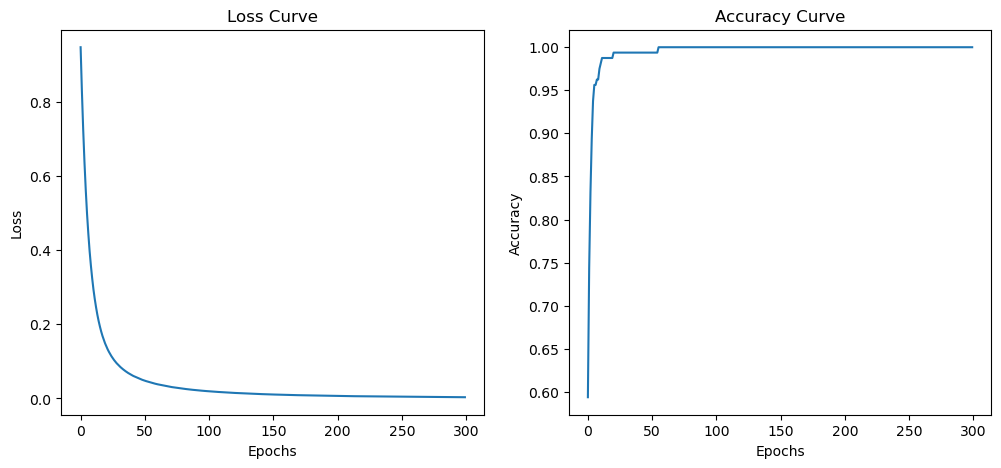

In [ ]:

'''
Create loss and accuracy plots.
'''
def plot(hist):
    _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    ax[0].plot(hist.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Curve')

    ax[1].plot(hist.history['accuracy'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Curve')

    plt.show()    

# loss and accuracy plots
plot(hist)

In [ ]:
'''
Automatic evaluation of our model against test set
'''
def auto_eval(model, x_test, y_test_1hot):
    loss, accuracy = model.evaluate(x=x_test, y=y_test_1hot)

    print('loss = ', loss)
    print('accuracy = ', accuracy)    


# tensorflow will do auto-evaluation of model against test set
auto_eval(model, x_test_pca, y_test_1hot)



1/1 [==============================] - 0s 23ms/step - loss: 0.1015 - accuracy: 0.9444
loss =  0.10147345811128616
accuracy =  0.9444444179534912


In [ ]:
'''
Do our own evaluation; printing out predictions given by our model.
'''
def manual_eval(model, x_test, y_test_1hot):
    # get predicted values from model
    predictions = model.predict(x=x_test)

    # eyeball predicted values against actual ones
    for i in np.arange(len(predictions)):
        print('Actual: ', y_test_1hot[i], 'Predicted: ', predictions[i])        

    # compute accuracy
    n_preds = len(predictions)       
    correct = 0
    wrong = 0

    for i in np.arange(n_preds):
        pred_max = np.argmax(predictions[i])
        actual_max = np.argmax(y_test_1hot[i])
        if pred_max == actual_max:
            correct += 1
        else:
            wrong += 1
    
    print('correct: {0}, wrong: {1}'.format(correct, wrong))
    print('accuracy =', correct/n_preds)

# perform manual evaluation of our model using test set
manual_eval(model, x_test_pca, y_test_1hot)

1/1 [==============================] - 0s 100ms/step
Actual:  [0 0 1] Predicted:  [8.8389572e-07 1.0576950e-08 9.9999905e-01]
Actual:  [1 0 0] Predicted:  [9.9999988e-01 2.3013398e-09 9.7906785e-08]
Actual:  [1 0 0] Predicted:  [0.7012887  0.28329834 0.01541293]
Actual:  [0 0 1] Predicted:  [3.749295e-05 1.095805e-03 9.988667e-01]
Actual:  [0 1 0] Predicted:  [2.6631847e-07 9.9999964e-01 9.2248449e-08]
Actual:  [0 1 0] Predicted:  [0.10479578 0.3374664  0.5577378 ]
Actual:  [0 1 0] Predicted:  [3.8444844e-07 9.9999964e-01 3.7070158e-09]
Actual:  [1 0 0] Predicted:  [9.9999881e-01 8.6648537e-09 1.2136411e-06]
Actual:  [0 0 1] Predicted:  [3.675030e-05 2.047913e-04 9.997584e-01]
Actual:  [1 0 0] Predicted:  [9.9999905e-01 4.2497030e-07 4.2594613e-07]
Actual:  [0 1 0] Predicted:  [7.6623481e-05 9.9992311e-01 2.2127304e-07]
Actual:  [0 0 1] Predicted:  [4.796027e-07 8.336240e-08 9.999994e-01]
Actual:  [0 1 0] Predicted:  [1.3830278e-07 9.9999988e-01 2.8960352e-08]
Actual:  [1 0 0] Predicte